   #                                                  Titanic Exercise II
   #### Practice matplotlib & seaborn

![titanic](https://userscontent2.emaze.com/images/a5f68f37-6349-4065-a1fc-921cbe7401b2/958230111417e36d6b3c67ffd7bc3494.jpeg)

First of all, import the needed libraries. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl # esto nunca usa
import matplotlib.pyplot as plt
import seaborn as sns


1. Read the `.csv` file you generated in **1_Titanic-Pandas** `titanic_cleaned.csv` and call the variable `titanic`.

Help: If you didn't get to the point in which you should have saved the file, ask the instructor. 

In [ ]:
filename = "titanic_cleaned.csv"

In [7]:
#your code
titanic = pd.read_csv ('data/titanic_cleaned.csv')


2. Using matplotlib find the appropriate visualization to show the distribution of the column `age`

Text(0.5, 1.0, 'Age')

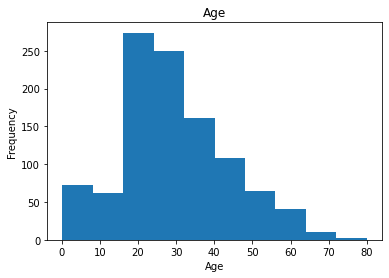

In [4]:
#your code here
titanic['age'].plot.hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title ("Age")



3. Now use seaborn to show the distribution of the column `age`.

Text(0.5, 1.0, 'Age')

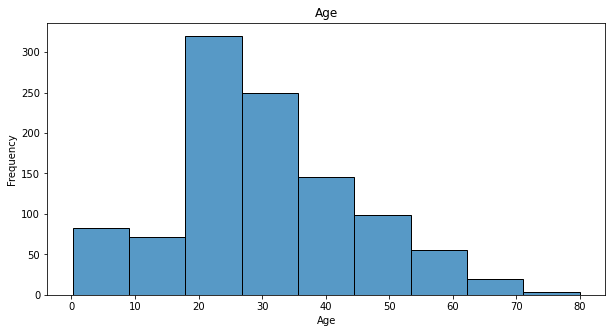

In [5]:
#your code here

plt.figure(figsize=(10,5))
sns.histplot(data= titanic, x = 'age', bins = 9)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title ("Age")

4. Use subplots to plot the distribution of the Age variable with bins equal to 10, 20 and 50.

Use `sns.histplot()` for that aim. 

<AxesSubplot:xlabel='age', ylabel='Count'>

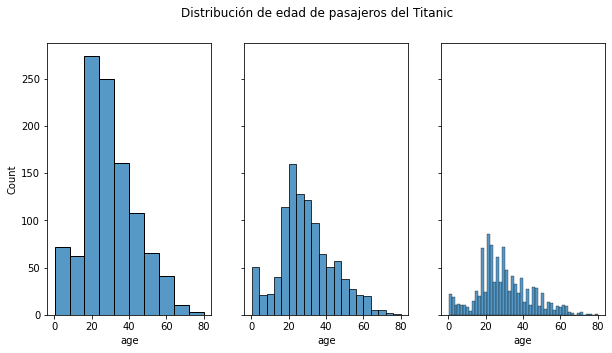

In [6]:
fig, axes = plt.subplots(1,3,figsize=(10,5), sharey= True)
fig.suptitle('Distribución de edad de pasajeros del Titanic')

sns.histplot(ax=axes[0], data= titanic, x = 'age', bins = 10)
sns.histplot(ax=axes[1], data= titanic, x = 'age', bins = 20)
sns.histplot(ax=axes[2], data= titanic, x = 'age', bins = 50)


5. Whether the bin size affects your plot? Why?

In [7]:
#your comment here

# Se crea mayor número de intervalos de edad según se aumentan los bins por lo que la frecuencia de cada intervalo tambien varía, siendo menor a medida que los bins son mayores 

6. Using matplotlib find the appropriate plot to visualize the column `'gender'` 

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

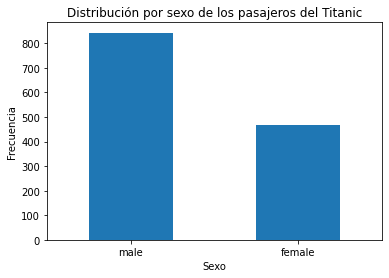

In [8]:
# your code here
titanic = titanic.rename(columns = {'sex':'gender'})

titanic['gender'].value_counts().plot(kind='bar')

plt.xlabel("Sexo")
plt.ylabel("Frecuencia")
plt.title ("Distribución por sexo de los pasajeros del Titanic")
plt.xticks(rotation = 0)




7. What if you also plot the column `'gender'` using the function [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) from the library [`seaborn`](https://seaborn.pydata.org/)?



Text(0.5, 0, 'Sexo')

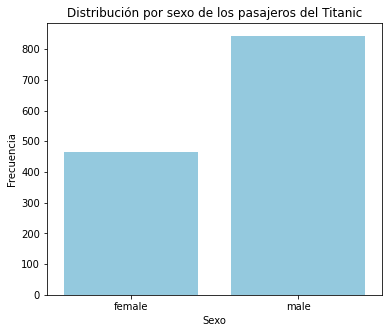

In [9]:
#your code
plt.figure(figsize=(6,5))
sns.countplot(data=titanic, x='gender', color = 'skyblue')
plt.title ("Distribución por sexo de los pasajeros del Titanic")
plt.ylabel('Frecuencia')
plt.xlabel('Sexo')



6. Using the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) from the library `seaborn`, find out if the hypothesis _"Women are more likely to survive shipwrecks"_ is true or not.

You should get something like this:

![catplot](img/catplot.png)

Text(0.5, 1.0, 'Supervivientes según sexo en el Titanic. Boxplot')

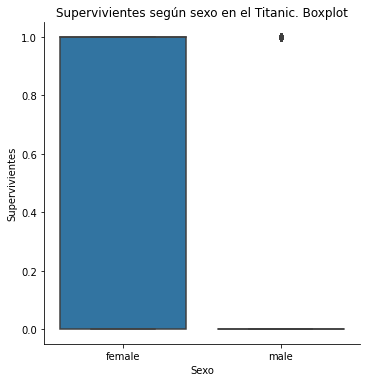

In [10]:
#your code
gender_survived = sns.catplot(x="gender", y="survived", kind="box", data=titanic)
plt.xlabel("Sexo")
plt.ylabel("Supervivientes")
plt.title ("Supervivientes según sexo en el Titanic. Boxplot")





In [8]:
# hay que identificar los outliers y eliminarlos o asignarles el valor que se considere 
# función que calcula en la columna que se especifique la mediana, el primer y tercer cuartil, el rango intercuartil, y el valor mínimo y máximo. Cualquier valor por encima del mínmo y máximo es un valor atípico

def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 75th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

In [9]:
get_iqr_values(titanic, 'survived')

(0.0, 0.0, 1.0, 1.0, -1.5, 2.5)

In [10]:
# Función para imprimir en un texto los valores de la mediana, cuartiles 25 y 75 recorrido intercuartílico y valores mínmo y máximo

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

In [11]:
get_iqr_text(titanic, 'survived')

'median=0.00, q1=0.00, q3=1.00, iqr=1.00, minimum=-1.50, maximum=2.50'

7. Use the appropriate plot to visualize the column `pclass`.

Text(0.5, 0, 'Clase')

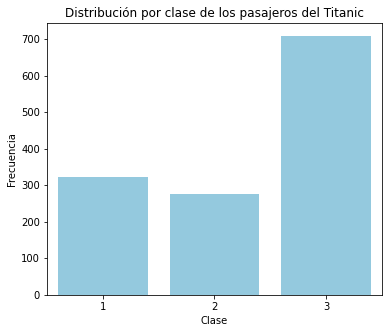

In [34]:
#your code
plt.figure(figsize=(6,5))
sns.countplot(data=titanic, x='pclass', color = 'skyblue')
plt.title ("Distribución por clase de los pasajeros del Titanic")
plt.ylabel('Frecuencia')
plt.xlabel('Clase')


8. We would like to have in one single plot the summary statistics of the feature `age`. Choose the appropriate plot to show below.

Text(0.5, 1.0, 'Boxplot de la edad de los pasajeros del Titanic')

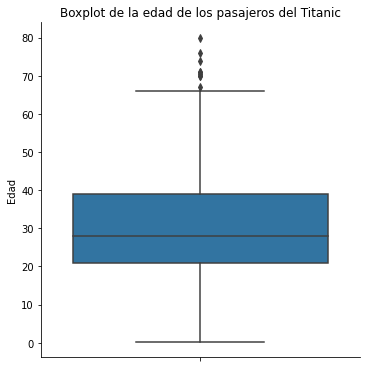

In [26]:
#your code
sns.catplot(y="age", kind="box", data=titanic)
plt.ylabel("Edad")
plt.title ("Boxplot de la edad de los pasajeros del Titanic")





In [24]:
get_iqr_values(titanic, 'age')
get_iqr_text(titanic, 'age')
    

'median=28.00, q1=21.00, q3=39.00, iqr=18.00, minimum=-6.00, maximum=66.00'

9. What does the previous plot tell you about the feature Age? Comment.

In [ ]:
# your comment here

# que la mediana de la edad es de 28 años el cuartil 25 es 21 años y el cuartil 75, 39 años. La eda máxima es de 66 (sin tener en cuenta los outliers). Si se tienen en cuenta los outliers, la edad máxima seguramente sea más alta.  

10. Now in addition to the summary statistics, we also want to visualize the distribution of `age`. Choose the appropriate plot to show below.

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución de la edad entre los pasajeros del Titanic')

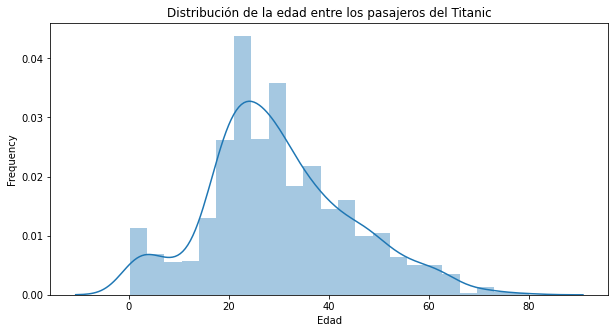

In [50]:
#your code
plt.figure(figsize=(10,5))
sns.distplot(titanic['age'], hist = True)
plt.xlabel("Edad")
plt.ylabel("Frequency")
plt.title ("Distribución de la edad entre los pasajeros del Titanic")


11. Use the appropriate plot to display the distributions of `age` in relation to `gender`.

Hint: use Facetgrid to display the distribution of age for each categorical value of gender. 



<Figure size 720x360 with 0 Axes>

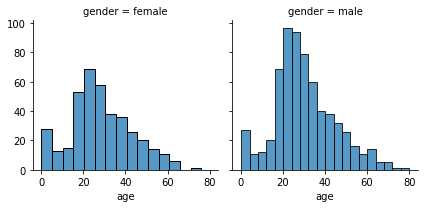

In [34]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(titanic, col='gender')
g.map(sns.histplot, 'age')


12. Using [`kdeplot`]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") from `seaborn` represent those who not survived distributed by age.

Hint: First you should "filter" the `titanic` dataset where the column "survived" is 0, indexing the column `"age"` only.

Arguments you should pass to the function: 

    - color = "red"
    - label = "Not Survived"
    - shade = True
    
You should get something like this: 

![kdeplot](img/kdeplot.png)

Text(0, 0.5, 'Probability Density')

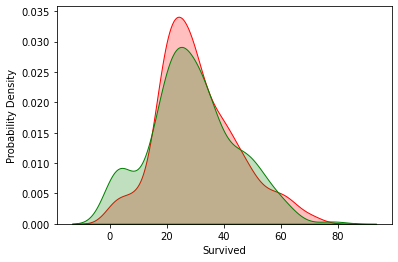

In [43]:
#your code 
sns.kdeplot(titanic.loc[(titanic['survived'] == 0), 'age'], color = 'r',shade=True, label ='Not survived')

sns.kdeplot(titanic.loc[(titanic['survived'] == 1), 'age'], color = 'g',shade=True, label ='Survived')

plt.xlabel('Survived')
plt.ylabel('Probability Density')




13. Using Seaborn plot the correlation matrix of various features.

Hint: search how to use `heatmap`



<AxesSubplot:>

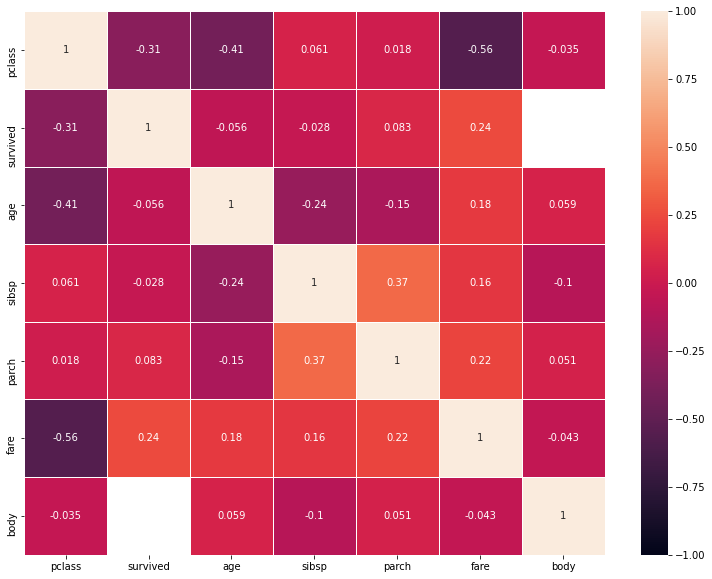

In [40]:
#your code here
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(titanic.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)



14. According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
'''
Las correlaciones positivas más altas se dan entre las variables: 
parch y sibsp: 0.37
supervivencia y fare: 0.24
fare y parch: 0.22

acompañados de esposa/ hermanos y de padres/hijos
Mayor supervivencia, mayor tasa 
mayor tasa y con mayor frecuencia acompañados de padres e hijos

Las correlaciones negativas más altas se encuentran entre las variables:
pclass y fare: -0.56
pclass y agae: -0.41
pclass y supervivencia: -0.31

Clase más baja( valor 3) menor edad, tarifa y supervivencia

'''
